# INF 264 - Project 2: Digit recognizer

## Introduction

In this project we will be using different classifiers to classify handwritten digits from the MNIST handwritten digits database. We will be evaluating the different classifiers by testing how well they perform on unseen data and selecting the best model based on the performance on validation data. Finally we will see how well the best model generalizes by seeing how well it performs on testing data.

In [125]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, recall_score, precision_score ,accuracy_score, confusion_matrix

## Loading in and exploring the data

In this section we will load in the datas and explore it a bit. We want to see how the data is structured, what value ranges are, the number distribution as well as if there are any null values in the data.

In [126]:
#read in MNIST-images.npy and MNIST-labels.npy
images = np.load('MNIST-images.npy')
labels = np.load('MNIST-labels.npy')

#First lets print the shape of the images and labels
print("Shape of images: ", images.shape)
print("Shape of labels: ", labels.shape)

Shape of images:  (85273, 24, 24, 1)
Shape of labels:  (85273,)


We can see that there are a total of 85273 images and labels where each image is a 24x24 array.

In [127]:
#Let's see if there are any null values in the dataset
print("Dataset contains null values: ", np.any(np.isnan(images)))

Dataset contains null values:  False


It looks like our dataset is complete, which means we don't have to account for null values by imputing values.

In [128]:
#Lets see what the range of values are
print("Range of values in images: ", np.min(images), "to", np.max(images))
print("Range of values in labels: ", np.min(labels), "to", np.max(labels))

Range of values in images:  0 to 255
Range of values in labels:  0 to 10


We can see that the values range from 0 to 10 where 10 means "not a number". Each image has a value from 0 to 255. These are greyscalevalues where 0 means white and 255 means black.
Lets try to have a look at the fist few images to see what they look like.

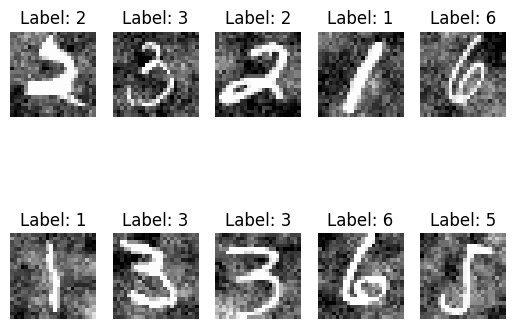

In [129]:
#Plot the first 10 images
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Label: {}'.format(labels[i]))
    plt.axis('off')

It is worth noting that there is quite a bit of noice in the background. Later we can try to reduce the noise with some image pre-processing and see if our models improve, but for now we can leave it as is.

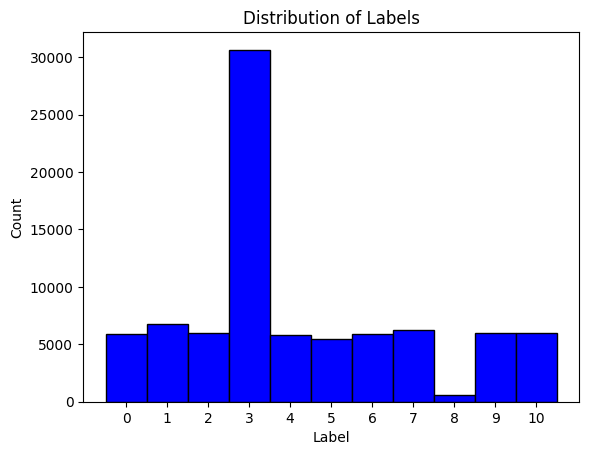

Label 0 : 5923
Label 1 : 6742
Label 2 : 5958
Label 3 : 30655
Label 4 : 5842
Label 5 : 5421
Label 6 : 5918
Label 7 : 6265
Label 8 : 600
Label 9 : 5949
Label 10 : 6000


In [130]:
#Next lets look at the distribution of labels in the dataset
plt.hist(labels, bins=np.arange(12)-0.5, color='blue', edgecolor='black')
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

#Print the amount of each label in the dataset
for i in range(11):
    print("Label", i, ":", np.sum(labels == i))

We can see that there is an imbalance in the dataset. There are way more images of three's than the rest of the numbers. Also we can see that there are very few eight's in the dataset. This imbaleance is something we need to take into account when choosing which metric to use for evaluating model performance. For example is accuracy score a poor metric for evaluating model performance on imbalanced data because we can simply predict the majority label every time and get a pretty good accuracy score. 

One method we can use to deal with the issue of the imbalance is to use resampling techniques. For example we could randomly remove about 24,000 three's to try and balance the data. This is called under-sampling. One disadvantage of this is that we lose a lot of our training data which may reduce the performance of a selected model. Also the small sample of three's selected may not represent the entire population of three's.

Similarily we can use over-sampling for the eight's by randomly duplicating or generate new eight's by using synthetic minority oversampling technique (SMOTE). The problem with this is that this can increase the chance of overfitting.

Because of the disadvantages that comes with resampling techniques we will instead choose a different metric to evaluate the models. Namely we will use Confusion matricies and F1-score.

Another thing we need to take into consideration is which classifiers to use on imbalanced datasets. Decision trees are known to perform well on imbalanced data, in particular ensembles like Random Forest Classifier. Therefore one of the classifiers we will use is the Random Forest Classifier.

## Splitting the data

In [131]:
#Splitting the data into training, validation and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(images, labels, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

Here we have used 70% of the data as training data, 15% for validation and 15% for testing. 

## Baseline models

### Majority class classifier

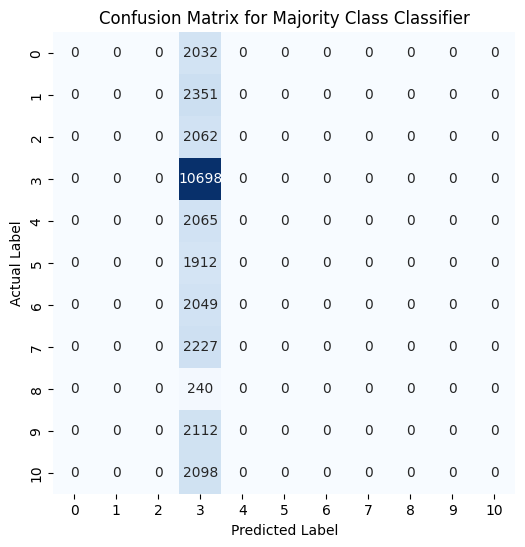

F1 score:  0.0479748152400086
Recall:  0.09090909090909091
Accuracy:  0.35843999195872145


In [132]:
#Majority class classifier
y_pred = np.full(y_val.shape, np.argmax(np.bincount(y_train)))

#Function to plot a confusion matrix
def plot_confusion_matric(y_val, y_pred, title):
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

#Plot the confusion matrix for the majority class classifier
plot_confusion_matric(y_val, y_pred, 'Confusion Matrix for Majority Class Classifier')

#Print F1 score, recall and accuracy
print("F1 score: ", f1_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))

### Random label classifier

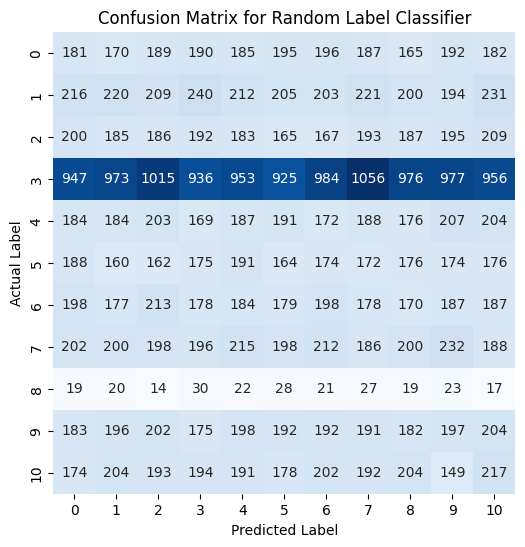

F1 score:  0.07927576947518818
Recall:  0.09024614501175982
Accuracy:  0.09016283589090665


In [133]:
#Random label classifier
y_pred = np.random.randint(0, 11, y_val.shape)

#Plot the confusion matrix for the random label classifier
plot_confusion_matric(y_val, y_pred, 'Confusion Matrix for Random Label Classifier')

#Print F1 score, recall and accuracy
print("F1 score: ", f1_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))